In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("../data/train.csv", index_col = 0)
test_df = pd.read_csv("../data/test.csv", index_col = 0)

In [3]:
#import pandas_profiling as ppf
#ppf.ProfileReport(train_df)

### 去除异常值和无效值

##### passenger_count的异常值

In [4]:
train_df['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [5]:
train_df = train_df.drop(train_df[train_df['passenger_count']>6].index)

#### 去除trip_duration的异常值，三个标准差之类

In [6]:
m = np.mean(train_df['trip_duration'])
s = np.std(train_df['trip_duration'])
train_df = train_df[train_df['trip_duration'] <= m + 3*s]
train_df = train_df[train_df['trip_duration'] >= m - 3*s]

#### 经纬度中的异常点   city_long_border =(-74.03,-73.75) city_lat_border =(40.63,40.85)

In [7]:
train_df = train_df[train_df['pickup_longitude'] <= -73.75]
train_df = train_df[train_df['pickup_longitude'] >= -74.03]
train_df = train_df[train_df['pickup_latitude'] <= 40.85]
train_df = train_df[train_df['pickup_latitude'] >= 40.63]
train_df = train_df[train_df['dropoff_longitude'] <= -73.75]
train_df = train_df[train_df['dropoff_longitude'] >= -74.03]
train_df = train_df[train_df['dropoff_latitude'] <= 40.85]
train_df = train_df[train_df['dropoff_latitude'] >= 40.63]

In [8]:
train_df.shape

(1437158, 10)

In [9]:
train_df

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...
id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764


#### 去除无用的dropoff_datetime

In [10]:
train_df.pop('dropoff_datetime')

id
id2875421    2016-03-14 17:32:30
id2377394    2016-06-12 00:54:38
id3858529    2016-01-19 12:10:48
id3504673    2016-04-06 19:39:40
id2181028    2016-03-26 13:38:10
                    ...         
id2376096    2016-04-08 13:44:02
id1049543    2016-01-10 07:46:10
id2304944    2016-04-22 07:10:25
id2714485    2016-01-05 16:02:39
id1209952    2016-04-05 14:47:43
Name: dropoff_datetime, Length: 1437158, dtype: object

### 处理训练集label并分离

Text(0, 0.5, 'Count')

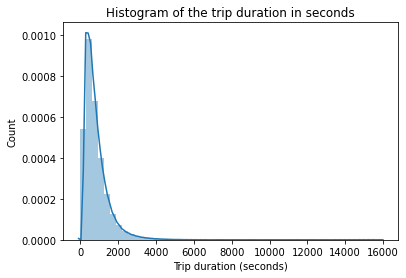

In [11]:
%matplotlib inline
sns.distplot(train_df['trip_duration'])
plt.title("Histogram of the trip duration in seconds")
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Count")
#plt.xlim(0,100000)

Text(0, 0.5, 'Count')

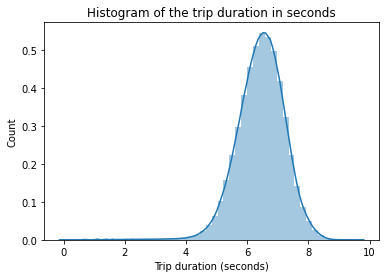

In [12]:
sns.distplot(np.log(train_df['trip_duration']))
plt.title("Histogram of the trip duration in seconds")
plt.xlabel("Trip duration (seconds)")
plt.ylabel("Count")

In [13]:
train_df.trip_duration.value_counts()

368      1622
348      1582
408      1582
367      1580
358      1575
         ... 
7354        1
13184       1
5605        1
5304        1
6024        1
Name: trip_duration, Length: 6014, dtype: int64

In [14]:
y_train = np.log1p(train_df.pop('trip_duration'))

#### 合并训练集和测试集进行处理

In [15]:
all_df = pd.concat((train_df,test_df), axis=0)

### 处理时间

In [16]:
import datetime
from datetime import datetime

In [17]:
all_df['pickup_datetime'] = pd.to_datetime(all_df.pickup_datetime)
all_df['Month'] = all_df['pickup_datetime'].dt.month
all_df['Day'] = all_df['pickup_datetime'].dt.day
all_df['Hour'] = all_df['pickup_datetime'].dt.hour
all_df['Weekday'] = all_df['pickup_datetime'].dt.dayofweek

年：舍弃，均为2016

月:直接做成类别，因为题目中的月份不多

天:

a:5,13

b:7,30

c:其他

月和天结合生成一个星期的特征

hour:

w:5,6,7

x:0.1.2.3.4.8.9.10.19.20.21.23

y:11.12.13.17.18.22

z:14.15.16

In [18]:
all_df['Day'] = all_df['Day'].astype(str)
all_df['Day'] = all_df['Day'].map({'5':'a', '13':'a',
                                   '7':'b',  '30':'b',
                                   '1':'c','2':'c','3':'c','4':'c',
                                   '6':'c','8':'c','9':'c','10':'c','11':'c','12':'c','14':'c','15':'c','16':'c','17':'c',
                                   '18':'c','19':'c','20':'c','21':'c','22':'c','23':'c','24':'c','25':'c','26':'c','27':'c',
                                   '28':'c','29':'c','30':'c','31':'c'
                                  })

In [19]:
all_df['Hour'] = all_df['Hour'].astype(str)
all_df['Hour'] = all_df['Hour'].map({
                                    '5':'w', '6':'w','7':'w',
                                    '0':'x','1':'x','2':'x','3':'x','4':'x','8':'x','9':'x','10':'x','19':'x','20':'x','21':'x','23':'x',
                                    '11':'y','12':'y','13':'y','17':'y','18':'y','22':'y',
                                    '14':'z','15':'z','16':'z',
                                  })

In [20]:
all_df['Weekday'] = all_df['Weekday'].astype(str)
all_df['Month'] = all_df['Month'].astype(str)
all_df['vendor_id'] = all_df['vendor_id'].astype(str)
all_df.pop('pickup_datetime')

id
id2875421   2016-03-14 17:24:55
id2377394   2016-06-12 00:43:35
id3858529   2016-01-19 11:35:24
id3504673   2016-04-06 19:32:31
id2181028   2016-03-26 13:30:55
                    ...        
id3008929   2016-01-01 00:02:52
id3700764   2016-01-01 00:01:52
id2568735   2016-01-01 00:01:24
id1384355   2016-01-01 00:00:28
id0621643   2016-01-01 00:00:22
Name: pickup_datetime, Length: 2062292, dtype: datetime64[ns]

添加距离

In [21]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return (c * r * 1000)

def mahattan(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    a = haversine(lon1, lat1, lon1, lat2)
    b = haversine(lon1, lat2, lon2, lat2)
    return (a+b)


def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))


In [22]:
all_df['distance'] = all_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda x:
                            haversine(x['pickup_longitude'],x['pickup_latitude'],x['dropoff_longitude'],x['dropoff_latitude']),axis = 1)

all_df['mahattan'] = all_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda x:
                              mahattan(x['pickup_longitude'],x['pickup_latitude'],x['dropoff_longitude'],x['dropoff_latitude']),axis = 1)

all_df['direction'] = all_df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(lambda x:
                             bearing_array(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude']),axis = 1)

In [23]:
all_df['dist_long'] = all_df['pickup_longitude'] - all_df['dropoff_longitude']
all_df['dist_lat'] = all_df['pickup_latitude'] - all_df['dropoff_latitude']

#### 添加位置堆

In [24]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42).fit(all_df[['pickup_longitude','pickup_latitude']])
pickup_clusters = kmeans.predict(all_df[['pickup_longitude','pickup_latitude']])

In [25]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(all_df[['dropoff_longitude','dropoff_latitude']])
dropoff_clusters = kmeans.predict(all_df[['dropoff_longitude','dropoff_latitude']])

In [26]:
all_df['pickup_clusters'] = pickup_clusters
all_df['dropoff_clusters'] = dropoff_clusters 
all_df['pickup_clusters'] = all_df['pickup_clusters'].astype(str)
all_df['dropoff_clusters'] = all_df['dropoff_clusters'].astype(str)

In [27]:
all_dummy_df = pd.get_dummies(all_df)
all_dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2062292 entries, id2875421 to id0621643
Data columns (total 44 columns):
 #   Column                Dtype  
---  ------                -----  
 0   passenger_count       int64  
 1   pickup_longitude      float64
 2   pickup_latitude       float64
 3   dropoff_longitude     float64
 4   dropoff_latitude      float64
 5   distance              float64
 6   mahattan              float64
 7   direction             float64
 8   dist_long             float64
 9   dist_lat              float64
 10  vendor_id_1           uint8  
 11  vendor_id_2           uint8  
 12  store_and_fwd_flag_N  uint8  
 13  store_and_fwd_flag_Y  uint8  
 14  Month_1               uint8  
 15  Month_2               uint8  
 16  Month_3               uint8  
 17  Month_4               uint8  
 18  Month_5               uint8  
 19  Month_6               uint8  
 20  Day_a                 uint8  
 21  Day_b                 uint8  
 22  Day_c                 uint8  
 23  Ho

In [28]:
#标准化数据
numeric_cols = all_dummy_df.columns[all_dummy_df.dtypes != 'object']
numeric_cols

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'distance', 'mahattan',
       'direction', 'dist_long', 'dist_lat', 'vendor_id_1', 'vendor_id_2',
       'store_and_fwd_flag_N', 'store_and_fwd_flag_Y', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Day_a', 'Day_b', 'Day_c',
       'Hour_w', 'Hour_x', 'Hour_y', 'Hour_z', 'Weekday_0', 'Weekday_1',
       'Weekday_2', 'Weekday_3', 'Weekday_4', 'Weekday_5', 'Weekday_6',
       'pickup_clusters_0', 'pickup_clusters_1', 'pickup_clusters_2',
       'pickup_clusters_3', 'pickup_clusters_4', 'dropoff_clusters_0',
       'dropoff_clusters_1', 'dropoff_clusters_2', 'dropoff_clusters_3',
       'dropoff_clusters_4'],
      dtype='object')

In [29]:
numeric_col_means = all_dummy_df.loc[:, numeric_cols].mean()
numeric_col_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_col_means) / numeric_col_std

In [30]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [31]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values

Ridge回归

In [ ]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import cross_val_score
# alphas = np.logspace(-1, 5, 10)
# test_scores = []
# for alpha in alphas:
#     clf = Ridge(alpha)
#     test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
#     test_scores.append(np.mean(test_score))
# plt.plot(alphas, test_scores)
# plt.title("Alpha vs CV Error");

随机树

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import cross_val_score
# max_features = [.1, .3, .5, .7, .9, .99]
# test_scores = []
# for max_feat in max_features:
#     clf = RandomForestRegressor(n_estimators=200, max_features=max_feat)
#     test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
#     test_scores.append(np.mean(test_score))
# plt.plot(max_features, test_scores)
# plt.title("Max Features vs CV Error");

Bagging把很多的小分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票制）
决策树

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import cross_val_score
# params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
# test_scores = []
# for param in params:
#     clf = AdaBoostRegressor(n_estimators=param)
#     test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
#     test_scores.append(np.mean(test_score))
# import matplotlib.pyplot as plt
# %matplotlib inline
# plt.plot(params, test_scores)
# plt.title("n_estimator vs CV Error");

#### Boosting
Boosting比Bagging理论上更高级点，它也是揽来一把的分类器。但是把他们线性排列。下一个分类器把上一个分类器分类得不好的地方加上更高的权重

In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import cross_val_score
# params = [10, 15, 20, 25, 30, 35, 40, 45, 50]
# test_scores = []
# for param in params:
#     clf =AdaBoostRegressor(n_estimators=param)
#     test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
#     test_scores.append(np.mean(test_score))
# plt.plot(params, test_scores)
# plt.title("n_estimator vs CV Error");

In [53]:
from xgboost import XGBRegressor
import lightgbm as lgbm
from sklearn.model_selection import cross_val_score

#### lightgbm

In [33]:
lgb_params = {
    'metric' : 'rmse',
    'learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 }

In [34]:
lgb_df = lgbm.Dataset(X_train,y_train)
lgb_model = lgbm.train(lgb_params, lgb_df, num_boost_round=1500)
pred = lgb_model.predict(X_test)
y_reslut1 = np.exp(pred)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097629 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9104
[LightGBM] [Info] Number of data points in the train set: 1437158, number of used features: 42
[LightGBM] [Info] Start training from score 6.449792
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

XGB

In [ ]:
params = [9,10,11,12,13,14]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth=param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(params, test_scores)
plt.title("max_depth vs CV Error");

In [46]:
params = {
    'booster':            'gbtree',
    'objective':          'reg:linear',
    'learning_rate':      0.1,
    'max_depth':          11,
    'subsample':          0.8,
    'colsample_bytree':   0.7,
    'colsample_bylevel':  0.7,
    'silent':             1
}
dtrain = xgb.DMatrix(X_train, y_train)
gbm = xgb.train(params,
                dtrain,
                num_boost_round = 200)
y_reslut2 = np.exp(gbm.predict(xgb.DMatrix(X_test)))

[11:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### 合并

In [47]:
#ensemble = (0.8*pred_lgb + 0.4*pred_test) 0.42295
#ensemble = (0.7*pred_lgb + 0.3*pred_test) 0.38148
y_reslut = (0.6*y_reslut1 + 0.4*y_reslut2) #0.38124
#ensemble = (0.55*pred_lgb + 0.45*pred_test) 0.38126

In [48]:
submission_df = pd.DataFrame(data= {'id' : test_df.index, 'trip_duration': y_reslut})

In [49]:
submission_df

,id,trip_duration
0,id3004672,851.385794
1,id3505355,535.902790
2,id1217141,484.339893
3,id2150126,1013.358722
4,id1598245,395.945939
...,...,...
625129,id3008929,288.518276
625130,id3700764,1172.279897
625131,id2568735,1619.341898
625132,id1384355,2158.593654


In [50]:
import csv
submission_df.to_csv('results.csv',index = False)